# Practice Assignment 2 - Part 2
### Exercise 15 (Chapter 3, ISLR)
This notebook addresses Exercise 15 from Chapter 3 of ISLR, using the Boston dataset. We attempt to predict per capita crime rate crim from other variables and explore the significance of predictors, compare univariate and multivariate models, and test for non-linearities.

In [ ]:
# Remove All Environment Variables
rm(list = ls())

**Tasks:**

(a) For each predictor, fit a simple linear regression model to predict `crim`. Identify which predictors have statistically significant relationships. Visualize these relationships.  
(b) Fit a multiple linear regression model using all predictors and determine which are significant.  
(c) Compare the results from (a) and (b). Plot univariate regression coefficients (from (a)) vs. multiple regression coefficients (from (b)).  
(d) Check for non-linear associations by fitting polynomial models of the form  
$$ Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon $$
for each predictor.

In [1]:
# Load necessary packages
library(MASS)  # Contains Boston dataset
data("Boston")
head(Boston)
summary(Boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08205   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

In [10]:
?Boston

### Housing Values in Suburbs of Boston

The ‘Boston’ data frame has 506 rows and 14 columns.

 -    ‘crim’ per capita crime rate by town.

 -    ‘zn’ proportion of residential land zoned for lots over 25,000
          sq.ft.

 -    ‘indus’ proportion of non-retail business acres per town.

 -    ‘chas’ Charles River dummy variable (= 1 if tract bounds river; 0
          otherwise).

 -    ‘nox’ nitrogen oxides concentration (parts per 10 million).

 -    ‘rm’ average number of rooms per dwelling.

 -    ‘age’ proportion of owner-occupied units built prior to 1940.

 -    ‘dis’ weighted mean of distances to five Boston employment
          centres.

 -    ‘rad’ index of accessibility to radial highways.

 -    ‘tax’ full-value property-tax rate per $10,000.

 -    ‘ptratio’ pupil-teacher ratio by town.

 -    ‘black’ 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by
          town.

 -    ‘lstat’ lower status of the population (percent).

 -    ‘medv’ median value of owner-occupied homes in $1000s.

## (a) Univariate Regressions

We will fit simple linear regressions:  
For each predictor $X_j$, fit:  
$$ \text{crim} = \beta_0 + \beta_1 X_j + \epsilon. $$

We will then summarize which predictors are significantly associated with `crim`.

Let's store each fit and extract coefficients and p-values.

In [6]:
predictors <- names(Boston)[-1] # excluding 'crim' which is the response
univ_results <- lapply(predictors, function(var) {
    form <- as.formula(paste("crim ~", var))
fit <- lm(form, data=Boston)
return(summary(fit))
})

# Extract significance
p_values_univ <- sapply(univ_results, function(x) coef(x)[2,4])
names(p_values_univ) <- predictors
p_values_univ

zn        indus         chas          nox           rm          age 
5.506472e-06 1.450349e-21 2.094345e-01 3.751739e-23 6.346703e-07 2.854869e-16 
         dis          rad          tax      ptratio        black        lstat 
8.519949e-19 2.693844e-56 2.357127e-47 2.942922e-11 2.487274e-19 2.654277e-27 
        medv 
1.173987e-19

In [4]:
# Identify which are significant at 5% level
significant_univ <- names(p_values_univ[p_values_univ < 0.05])
significant_univ

[1] "zn"      "indus"   "nox"     "rm"      "age"     "dis"     "rad"    
 [8] "tax"     "ptratio" "black"   "lstat"   "medv"

We can plot `crim` against a few predictors and add the regression line to visualize associations.

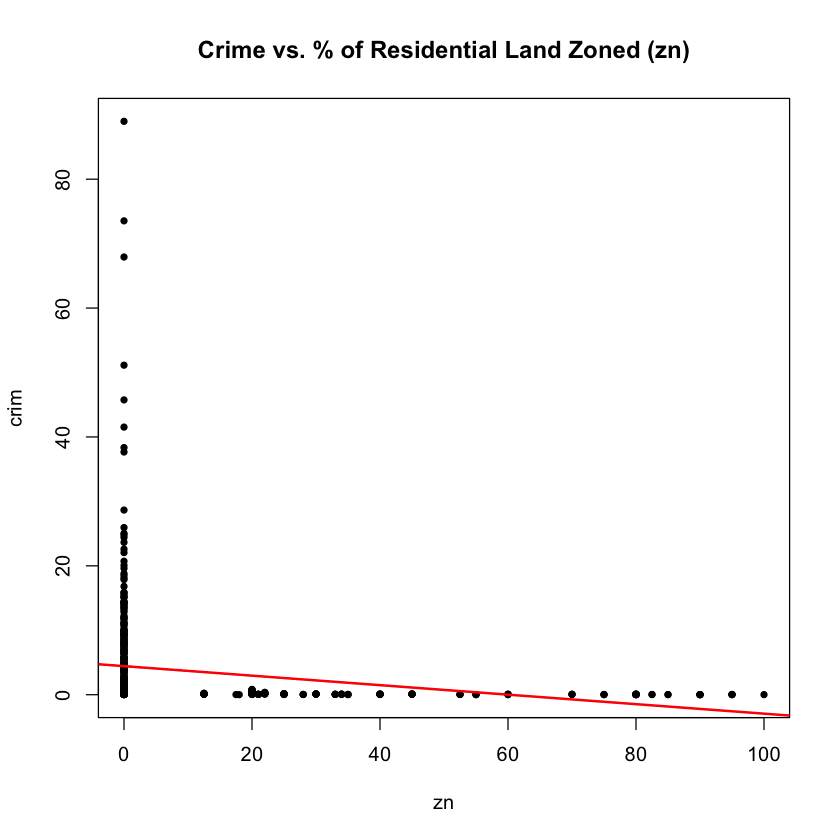

In [9]:
# Example plot for "indus"
plot(Boston$zn, Boston$crim, pch = 20,
xlab = "zn", ylab = "crim", main = "Crime vs. % of Residential Land Zoned (zn)")
abline(lm(crim
~zn, data = Boston), col="red", lwd=2)

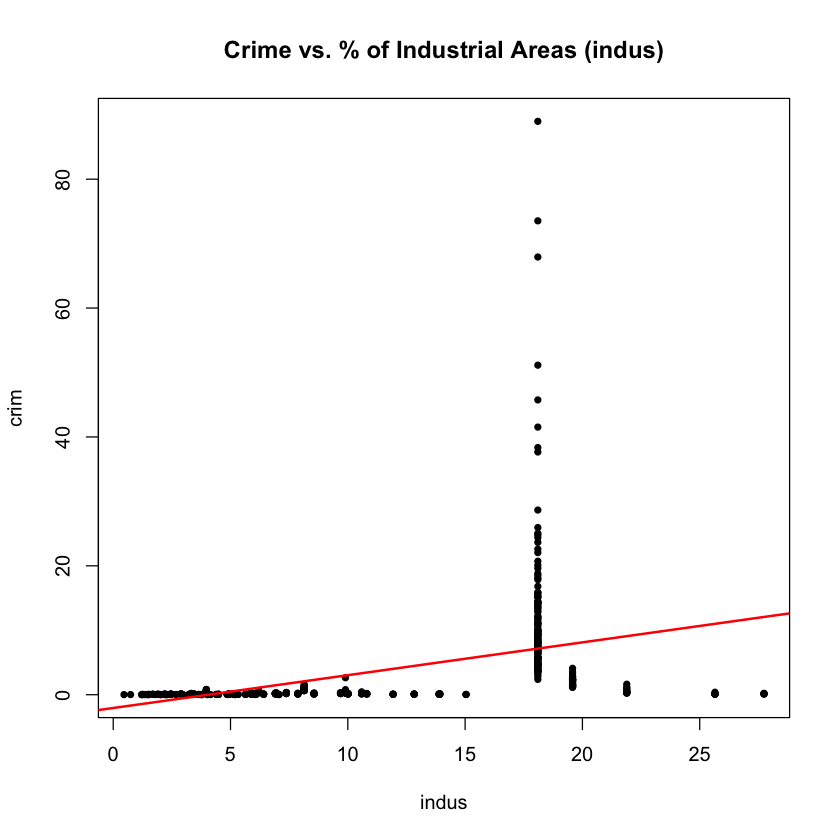

In [7]:
# Example plot for "indus"
plot(Boston$indus, Boston$crim, pch=20,
xlab="indus", ylab="crim", main="Crime vs. % of Industrial Areas (indus)")
abline(lm(crim~indus, data=Boston), col="red", lwd=2)

## (b) Multiple Regression

Now we fit a model including all predictors:
$$\text{crim} = \beta_0 + \beta_1 \cdot \text{zn} + \beta_2 \cdot \text{indus} + \cdots + \beta_{13} \cdot \text{medv} + \epsilon.$$

We will examine which predictors remain significant when controlling for all others.

In [11]:
lm.full <- lm(crim ~ ., data=Boston)
summary(lm.full)


Call:
lm(formula = crim ~ ., data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-9.924 -2.120 -0.353  1.019 75.051 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  17.033228   7.234903   2.354 0.018949 *  
zn            0.044855   0.018734   2.394 0.017025 *  
indus        -0.063855   0.083407  -0.766 0.444294    
chas         -0.749134   1.180147  -0.635 0.525867    
nox         -10.313535   5.275536  -1.955 0.051152 .  
rm            0.430131   0.612830   0.702 0.483089    
age           0.001452   0.017925   0.081 0.935488    
dis          -0.987176   0.281817  -3.503 0.000502 ***
rad           0.588209   0.088049   6.680 6.46e-11 ***
tax          -0.003780   0.005156  -0.733 0.463793    
ptratio      -0.271081   0.186450  -1.454 0.146611    
black        -0.007538   0.003673  -2.052 0.040702 *  
lstat         0.126211   0.075725   1.667 0.096208 .  
medv         -0.198887   0.060516  -3.287 0.001087 ** 
---
Signif. codes:  0 ‘***’ 0.0

## (c) Comparison of Results

We compare univariate vs. multiple regression coefficients. For each predictor:

- Univariate coefficient: slope from simple regression.
- Multiple regression coefficient: partial slope controlling for other variables.

We create a plot with univariate coefficients on the x-axis and multiple regression coefficients on the y-axis.

In [13]:
# Extract univariate coefficients (from each simple regression)
univ_coefs <- sapply(predictors, function(var) {
fit <- lm(as.formula(paste("crim ~", var)), data=Boston)
coef(fit)[2]
})

# Extract multivariate coefficients (excluding intercept)
multi_coefs <- coef(lm.full)[-1]

plot(univ_coefs, multi_coefs, xlab="Univariate Coefficients", ylab="Multiple Coefficients",
     pch=19, main="Univariate vs Multiple Coefficients")
text(univ_coefs, multi_coefs, labels=predictors, pos=4, cex=0.7)
abline(h=0, v=0, col="gray")

Notice that some predictors change their sign or magnitude when other variables are included. This can occur due to correlations among predictors (multicollinearity). For example, `nox` may appear strongly related to crime in the univariate analysis but changes when we control for other factors.

## (d) Non-linear Associations

We will check if adding quadratic and cubic terms improves the fit for each predictor.  
For each predictor $X$:

$$ \text{crim} = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon $$

We can use `anova()` to compare the simple linear model and the polynomial model.

In [16]:
# Example with "indus"
lm.indus.lin <- lm(crim ~ indus, data=Boston)
lm.indus.poly <- lm(crim ~ indus + I(indus^2) + I(indus^3), data=Boston)

# Compare models
anova(lm.indus.lin, lm.indus.poly)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,504,31186.71,NA,NA,NA,NA
2,502,27661.57,2,3525.137,31.98696,8.408754e-14


A significant reduction in RSS and a significant F-test indicates a non-linear relationship.

In this example, if the p-value is very low, it suggests that including $X^2$ and $X^3$ terms significantly improves the model. Thus, there is evidence of a non-linear relationship between `indus` and `crim`.

We encourage everyone to repeat this analysis for other predictors to identify where non-linearity may be present.